Deep Learning 1st homework

Exercise 1

In [1]:
#importing packages
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
# for opening the audio file
from scipy.io import wavfile

In [2]:
#the list of the name of the images
im_names=['4.1.03.tiff','4.1.04.tiff','4.1.05.tiff','4.1.06.tiff','4.1.07.tiff']
#reading the images in and then converting to numpy arrays
data=[np.asarray(plt.imread(name)) for name in im_names]

In [3]:
#checking the size of the images
for i in range(len(data)):
    print(data[i].shape),

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


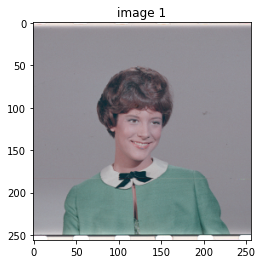

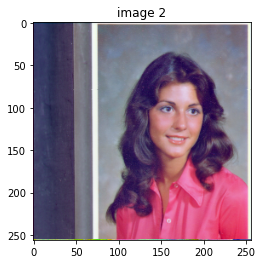

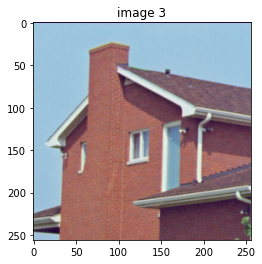

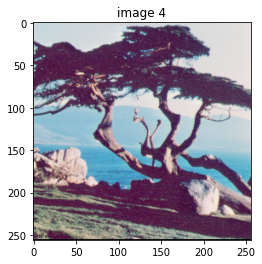

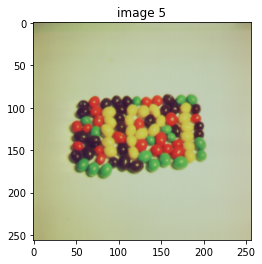

In [4]:
#printing out the images
for i, image_data in enumerate(data):
    plt.imshow(image_data)
    plt.title('image '+str(i+1))
    plt.show()

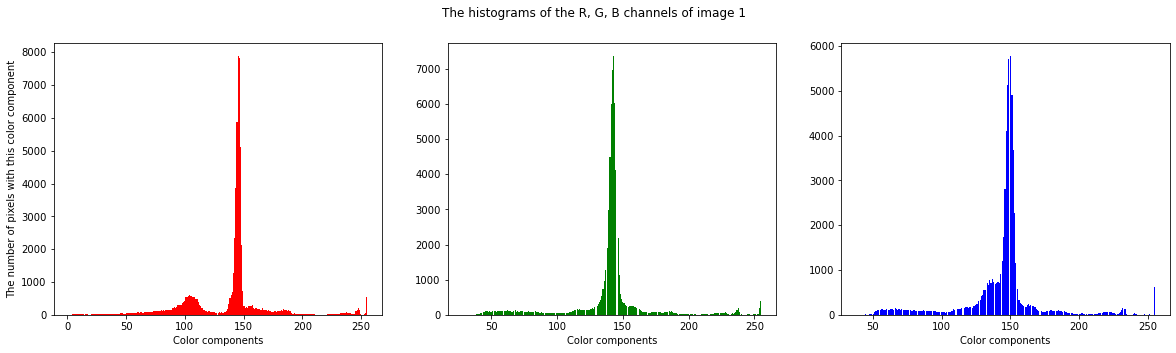

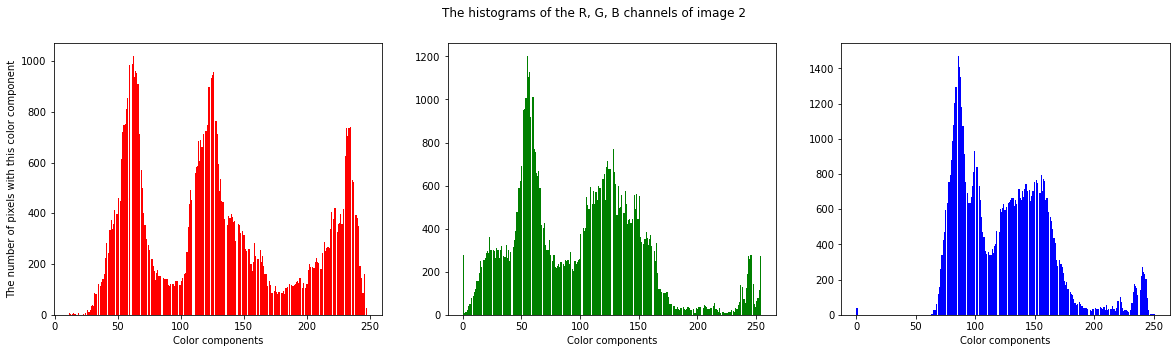

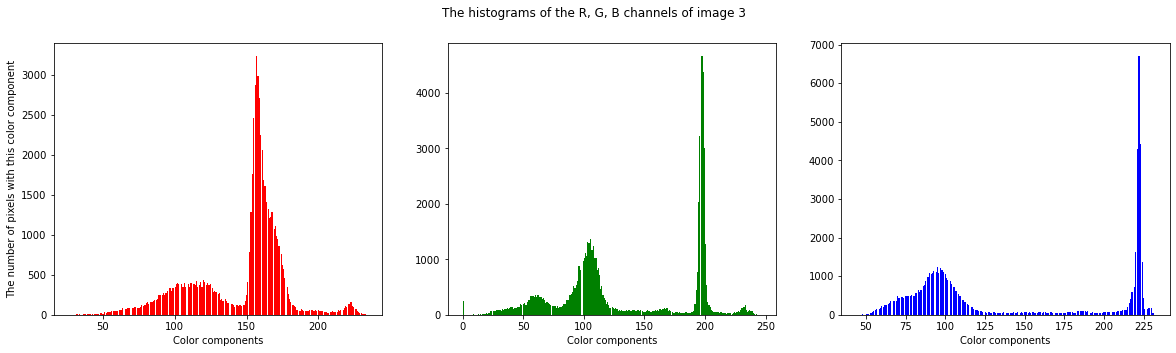

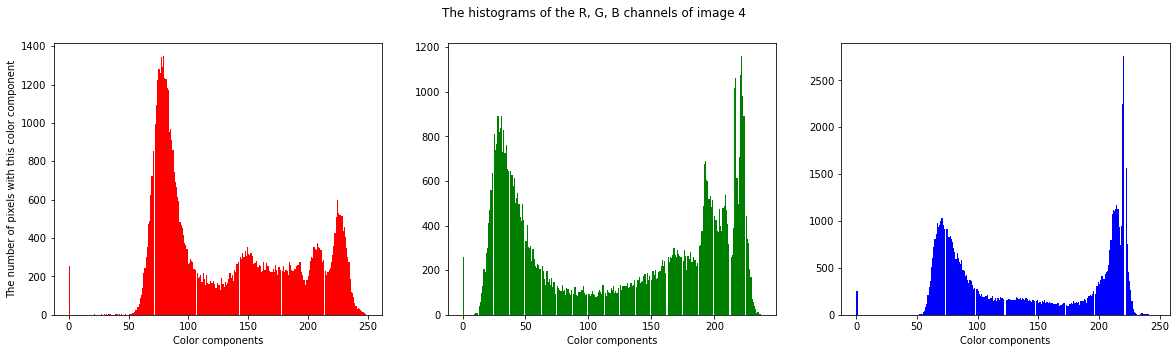

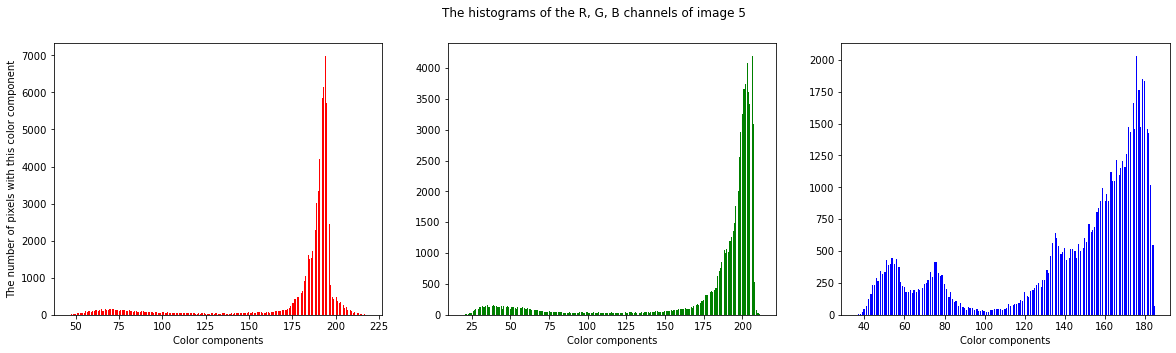

In [5]:
#histograms of the R, G, B channels of the images in the previous order

#for every image (there are five) we are making three histograms
for image_number in range(5):
    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle('The histograms of the R, G, B channels of image '+str(image_number+1))
    #selecting the red channel from the data and reshaping it in the form (256*256,1) (bins=256 because each color has 256 components)
    axs[0].hist(data[image_number][:,:,0].reshape(256*256,), bins=256, color='r')
    #selecting the green channel from the data
    axs[1].hist(data[image_number][:,:,1].reshape(256*256,), bins=256, color='g')
    #selecting the blue channel from the data
    axs[2].hist(data[image_number][:,:,2].reshape(256*256,), bins=256, color='b')
    axs[0].set(ylabel='The number of pixels with this color component')
    for ax in axs.flat:
        ax.set(xlabel='Color components')
    plt.show()

Exercise 2

In [6]:
#calculating mean and std for every color channel and  every image, and then transforming the data to the form, where it has mean:0 and std:1, and lastly checking that it is true
#dictionary for channels:
channels={0:'red', 1:'green', 2:'blue'}

#we are calculating for every image and for every color
for image_number in range(5):
    for channel in range(3):
        #printing out the names of the image and the color channel
        print('image '+str(image_number+1)+', color channel: '+channels[channel])
        #printing out the mean and the standard deviation
        print('mean: '+str(data[image_number][:,:,channel].reshape(256*256,).mean())+', standard deviation: '+str(data[image_number][:,:,channel].reshape(256*256,).std()))
        #transforming the data and printing out the mean and the standard deviation after transformation
        print('after transformation - mean: '+str(((data[image_number][:,:,channel].reshape(256*256,)-data[image_number][:,:,channel].reshape(256*256,).mean())/ data[image_number][:,:,channel].reshape(256*256,).std()).mean())+', std: '+str(((data[image_number][:,:,channel].reshape(256*256,)-data[image_number][:,:,channel].reshape(256*256,).mean())/ data[image_number][:,:,channel].reshape(256*256,).std()).std())+'\n')

image 1, color channel: red
mean: 137.602783203125, standard deviation: 34.070185677043696
after transformation - mean: 2.0816681711721685e-17, std: 1.0

image 1, color channel: green
mean: 139.957763671875, standard deviation: 29.29629819480199
after transformation - mean: 0.0, std: 1.0

image 1, color channel: blue
mean: 144.01779174804688, standard deviation: 28.541392268315462
after transformation - mean: 1.3877787807814457e-17, std: 1.0

image 2, color channel: red
mean: 129.21807861328125, standard deviation: 62.50125916950087
after transformation - mean: 0.0, std: 1.0

image 2, color channel: green
mean: 99.2674560546875, standard deviation: 53.575539286933584
after transformation - mean: -1.0408340855860843e-17, std: 1.0

image 2, color channel: blue
mean: 125.19926452636719, standard deviation: 39.36669966235115
after transformation - mean: 3.469446951953614e-18, std: 1.0

image 3, color channel: red
mean: 146.56402587890625, standard deviation: 31.736702928883542
after transf

Exercise 3

In [7]:
#reading the audio files in
Frequency1, Data1 = wavfile.read('aguero.wav')
Frequency2, Data2 = wavfile.read('ibra.wav')
#for the simplicity
Data=[Data1, Data2]

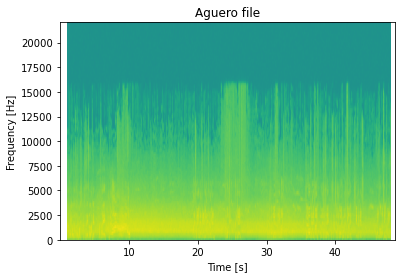

In [16]:
# selecting left channel only, because it is a dual audio file
plt.specgram(Data1[:,0],Fs=Frequency1)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Aguero file')
plt.show()

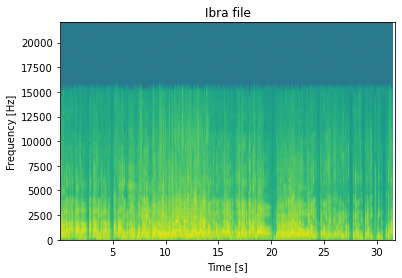

In [9]:
# selecting left channel only
plt.specgram(Data2[:,0],Fs=Frequency2)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Ibra file')
plt.show()

Exercise 4

In [10]:
#having a look at the data shapes
print(Data1.shape, Data2.shape)

(2145280, 2) (1398784, 2)


In [11]:
#calculating mean and std for every channel and for both audio files, and then transforming the data to the form, where it has mean:0 and std:1, and lastly checking that it is true
#dictionary for files and channels and dimensions
audfiles={0:'Aguero', 1:'Ibra'}
audchannels={0:'left', 1:'right'}
for file in range(2):
    for channel in range(2):
        #printing out the names of the file and the channel
        print('file '+str(audfiles[file])+', channel: '+audchannels[channel])
        #printing out the mean and the standard deviation
        print('mean: '+str(Data[file][:, channel].mean())+', standard deviation: '+str(Data[file][:,channel].std()))
        #transforming the data and printing out the mean and the standard deviation after transformation
        print('after transformation - mean: '+str(((Data[file][:,channel]-Data[file][:,channel].mean())/ Data[file][:,channel].std()).mean())+', std: '+str(((Data[file][:,channel]-Data[file][:,channel].mean())/ Data[file][:,channel].std()).std())+'\n')

file Aguero, channel: left
mean: -0.019570871867541768, standard deviation: 1905.9009688406484
after transformation - mean: -1.597775027340064e-17, std: 1.0

file Aguero, channel: right
mean: -0.019577397822195704, standard deviation: 1905.9009688320216
after transformation - mean: -2.1685570130573493e-17, std: 1.0000000000000002

file Ibra, channel: left
mean: 0.07372689421669107, standard deviation: 4805.036440308009
after transformation - mean: -1.3866358443770686e-17, std: 0.9999999999999999

file Ibra, channel: right
mean: 0.07068925581076135, standard deviation: 4805.0096507744665
after transformation - mean: -3.208476472954175e-18, std: 0.9999999999999997



Exercise 5

In [14]:
#import packages
from bs4 import BeautifulSoup
from urllib.request import urlopen

#getting the text of the page
url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")
output=soup.get_text()
print(output)

﻿



  

Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT


















































Languages


Magyar

English







Menü be/kikapcsolás











                            RÓLUNK
                        

Laborunkról
Munkatársaink
Média megjelenések






                            MEGOLDÁSAINK
                        

Profivox magyar nyelvű felolvasó (korpuszos)
Profivox magyar nyelvű felolvasó (DNN)
Profivox magyar nyelvű felolvasó (HMM)
Profivox magyar nyelvű felolvasó (diádos,triádos)
StrokeAid

Alkalmazások

Jaws for Windows integráció
Időjárás mindenkinek (magyar, Windows 8)
AALFred (5 nyelven, Windows 8.1)
Robobraille
Beszélő ATM-ek

Gyógyszervonal (OGYI)

Árlista felolvasó (T-mobile)
Keleti pályaudvar bemondórendszere
Mindenség elmélete c. film gépi beszéd szinkron








                            K+F
                        


Kutatási projektek (folyamatban)
Kutatási projektek (befejezett)
Publikációk (összes

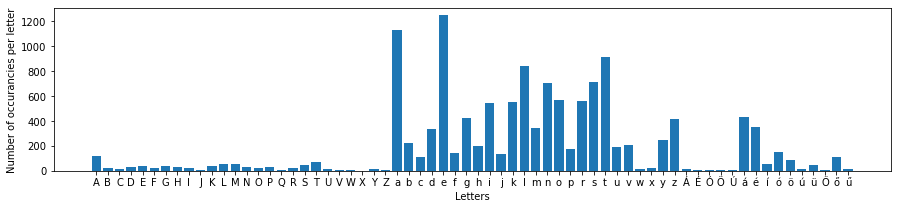

In [15]:
#importing package
import collections

#counting the occurancies of the letters
c = collections.Counter(output)
#sorting the dict
dictionary = collections.OrderedDict(sorted(c.items()))
#extracting the letters from the dictionary
finaldict={}
for key, value in dictionary.items():
    if key.isalpha():
        finaldict[key]=value
        
#making the histogram
#print(finaldict)
plt.figure(figsize=(15,3))
plt.bar(finaldict.keys(),finaldict.values())
plt.xlabel('Letters')
plt.ylabel('Number of occurancies per letter')
plt.show()